<a href="https://colab.research.google.com/github/Palak-Ai-2006/ML-BOOTCAMP/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("h")

h


In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [3]:
train_data= datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data= datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 34.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.16MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.32MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.targets.size()

torch.Size([60000])

In [7]:
from torch.utils.data import DataLoader
loaders={
    'train':DataLoader(train_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),
    'test':DataLoader(test_data,
                      batch_size=100,
                      shuffle=True,
                      num_workers=1),
}

In [8]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7b7263350b50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7b72633501f0>}

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.conv1=nn.Conv2d(in_channels=1,
                             out_channels=16,
                             kernel_size=5,)
        self.conv2=nn.Conv2d(in_channels=10,
                             out_channels=20,
                             kernel_size=5,
                             )
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(320,50)
        self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)

        return F.log_softmax(x)

In [19]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.conv1=nn.Conv2d(in_channels=1,
                             out_channels=16,
                             kernel_size=5,)
        # Change in_channels to 16 to match conv1 output
        self.conv2=nn.Conv2d(in_channels=16,
                             out_channels=20,
                             kernel_size=5,
                             )
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(320,50)
        self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)

        return F.log_softmax(x)

In [20]:
import torch
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=CNN().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(loaders['train']):
        data,target=data.to(device),target.to(device)
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output,target)
        loss.backward()
import torch
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=CNN().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(loaders['train']):
        data,target=data.to(device),target.to(device)
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if(batch_idx+1)%20==0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. *batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')


In [21]:
def test():
    model.eval()

    test_loss=0
    correct=0

    with torch.no_grad():
        for data,target in loaders['test']:
            data,target=data.to(device),target.to(device)
            output=model(data)
            test_loss+=loss_fn(output,target).item()
            pred=output.argmax(dim=1,keepdim=True)
            correct+=pred.eq(target.view_as(pred)).sum().item()
    test_loss/=len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')


In [22]:
for epoch in range(1,10):
    train(epoch)
    test()

<ipython-input-19-0ebfdabe8b05>:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [1900/60000 (3%)]	2.252202
Train Epoch: 1 [3900/60000 (6%)]	1.894777
Train Epoch: 1 [5900/60000 (10%)]	1.262901
Train Epoch: 1 [7900/60000 (13%)]	1.014854
Train Epoch: 1 [9900/60000 (16%)]	0.855308
Train Epoch: 1 [11900/60000 (20%)]	0.748414
Train Epoch: 1 [13900/60000 (23%)]	0.627456
Train Epoch: 1 [15900/60000 (26%)]	0.750868
Train Epoch: 1 [17900/60000 (30%)]	0.527140
Train Epoch: 1 [19900/60000 (33%)]	0.648979
Train Epoch: 1 [21900/60000 (36%)]	0.517239
Train Epoch: 1 [23900/60000 (40%)]	0.416863
Train Epoch: 1 [25900/60000 (43%)]	0.529588
Train Epoch: 1 [27900/60000 (46%)]	0.460656
Train Epoch: 1 [29900/60000 (50%)]	0.546038
Train Epoch: 1 [31900/60000 (53%)]	0.349455
Train Epoch: 1 [33900/60000 (56%)]	0.513337
Train Epoch: 1 [35900/60000 (60%)]	0.246458
Train Epoch: 1 [37900/60000 (63%)]	0.244163
Train Epoch: 1 [39900/60000 (66%)]	0.320635
Train Epoch: 1 [41900/60000 (70%)]	0.410731
Train Epoch: 1 [43900/60000 (73%)]	0.459826
Train Epoch: 1 [45900/60000 (76%)]	0.53

<ipython-input-19-0ebfdabe8b05>:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Prediction: 7


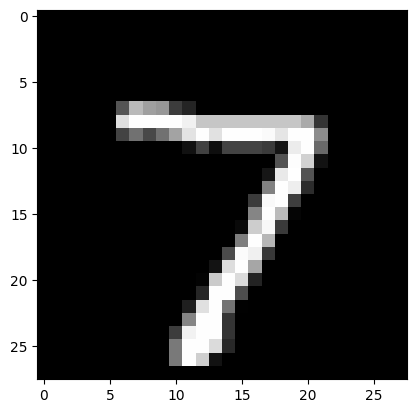

In [25]:
import matplotlib.pyplot as plt
model.eval()

data,target= test_data[0]
data = data.unsqueeze(0).to(device)
output = model(data)
pred = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {pred}')
# Changed 'sequeeze' to 'squeeze'
image=data.squeeze(0).squeeze(0).numpy()
plt.imshow(image,cmap='gray')
plt.show()

In [28]:
print(model.pred(test_data))

AttributeError: 'CNN' object has no attribute 'pred'